# Data Pre-processing and EDA

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, log_loss, roc_auc_score, roc_curve, auc, f1_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('C:/Users/Rohan Sharma/Desktop/Datasets/Spotify.csv')

In [3]:
df.head()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,t_0479f24c-27d2-46d6-a00c-7ec928f2b539,False,False,False,True,0,0,...,0,0,0,True,16,7/15/2018,True,editorial_playlist,trackdone,trackdone
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,t_9099cd7b-c238-47b7-9381-f23f2c1d1043,False,False,False,True,0,1,...,0,0,0,True,16,7/15/2018,True,editorial_playlist,trackdone,trackdone
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0,False,False,False,True,0,1,...,0,0,0,True,16,7/15/2018,True,editorial_playlist,trackdone,trackdone
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,t_23cff8d6-d874-4b20-83dc-94e450e8aa20,False,False,False,True,0,1,...,0,0,0,True,16,7/15/2018,True,editorial_playlist,trackdone,trackdone
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,t_64f3743c-f624-46bb-a579-0f3f9a07a123,False,False,False,True,0,1,...,0,0,0,True,16,7/15/2018,True,editorial_playlist,trackdone,trackdone


In [4]:
df.tail()

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
167874,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,15,20,t_e76ba594-cebd-472d-a2da-483568be0406,False,False,False,True,0,1,...,0,0,0,False,13,7/15/2018,True,user_collection,trackdone,trackdone
167875,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,16,20,t_360910e8-2a84-42b0-baf1-59abcf96a1f2,False,False,False,True,0,1,...,0,0,0,False,13,7/15/2018,True,user_collection,trackdone,trackdone
167876,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,17,20,t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a,False,False,False,True,0,1,...,0,0,0,False,13,7/15/2018,True,user_collection,trackdone,trackdone
167877,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,18,20,t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381,False,False,False,True,0,1,...,0,0,0,False,13,7/15/2018,True,user_collection,trackdone,trackdone
167878,0_0eaeef5d-25e9-4429-bd55-af15d3604c9f,19,20,t_e172e8e7-7161-42a9-acb0-d606346c8f87,False,False,False,True,0,1,...,0,0,0,False,13,7/15/2018,True,user_collection,trackdone,trackdone


In [5]:
df.shape

(167879, 21)

In [6]:
df.dtypes

session_id                         object
session_position                    int64
session_length                      int64
track_id_clean                     object
skip_1                               bool
skip_2                               bool
skip_3                               bool
not_skipped                          bool
context_switch                      int64
no_pause_before_play                int64
short_pause_before_play             int64
long_pause_before_play              int64
hist_user_behavior_n_seekfwd        int64
hist_user_behavior_n_seekback       int64
hist_user_behavior_is_shuffle        bool
hour_of_day                         int64
date                               object
premium                              bool
context_type                       object
hist_user_behavior_reason_start    object
hist_user_behavior_reason_end      object
dtype: object

In [7]:
df.shape[0]

167879

In [8]:
print(df.isnull().sum())

session_id                         0
session_position                   0
session_length                     0
track_id_clean                     0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
dtype: int64


In [9]:
df.session_id.unique()

array(['0_00006f66-33e5-4de7-a324-2d18e439fc1e',
       '0_0000a72b-09ac-412f-b452-9b9e79bded8f',
       '0_00010fc5-b79e-4cdf-bc4c-f140d0f99a3a', ...,
       '0_0ead11fc-f32c-4eb4-8fc1-15b51432a404',
       '0_0eae096d-ae4c-4556-8227-0f6294958330',
       '0_0eaeef5d-25e9-4429-bd55-af15d3604c9f'], dtype=object)

## More info about columns


session_id - unique identifier for the session that this row is a part of

session_position {1-20} - position of row within session

session_length {10-20} - number of rows in session

track_id_clean - unique identifier for the track played. This is linked with track_id in the track features and metadata table.

skip_1 - Boolean indicating if the track was only played very briefly

skip_2 - Boolean indicating if the track was only played briefly

skip_3 - Boolean indicating if most of the track was played

not_skipped Boolean indicating that the track was played in its entirety

context_switch - Boolean indicating if the user changed context between the previous row and the current row. This could for example occur if the user switched from one playlist to another.

no_pause_before_play - Boolean indicating if there was no pause between playback of the previous track and this track

short_pause_before_play - Boolean indicating if there was a short pause between playback of the previous track and this track

long_pause_before_play - Boolean indicating if there was a long pause between playback of the previous track and this track

hist_user_behavior_n_seekfwd - Number of times the user did a seek forward within track

hist_user_behavior_n_seekback - Number of times the user did a seek back within track

hist_user_behavior_is_shuffle - Boolean indicating if the user encountered this track while shuffle mode was activated

hour_of_day {0-23} - The hour of day

date - E.g. 2018-09-18 - The date

premium - Boolean indicating if the user was on premium or not. This has potential implications for skipping behavior.

context_type - E.g. editorial playlist - what type of context the playback occurred within

hist_user_behavior_reason_start - E.g. fwdbtn - the user action which led to the current track being played

hist_user_behavior_reason_end - E.g. trackdone - the user action which led to the current track playback ending

In [10]:
def make_bool_num(df):
    for col in df:
        if df[col].dtype == 'bool':
            df[col] = df[col] * 1
    return df[col] 

make_bool_num(df)

0         trackdone
1         trackdone
2         trackdone
3         trackdone
4         trackdone
            ...    
167874    trackdone
167875    trackdone
167876    trackdone
167877    trackdone
167878    trackdone
Name: hist_user_behavior_reason_end, Length: 167879, dtype: object

In [11]:
df.dtypes

session_id                         object
session_position                    int64
session_length                      int64
track_id_clean                     object
skip_1                              int32
skip_2                              int32
skip_3                              int32
not_skipped                         int32
context_switch                      int64
no_pause_before_play                int64
short_pause_before_play             int64
long_pause_before_play              int64
hist_user_behavior_n_seekfwd        int64
hist_user_behavior_n_seekback       int64
hist_user_behavior_is_shuffle       int32
hour_of_day                         int64
date                               object
premium                             int32
context_type                       object
hist_user_behavior_reason_start    object
hist_user_behavior_reason_end      object
dtype: object

In [12]:
spotify_int64 = df.select_dtypes(include='int64')

In [13]:
spotify_int64.head()

,session_position,session_length,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hour_of_day
0,1,20,0,0,0,0,0,0,16
1,2,20,0,1,0,0,0,0,16
2,3,20,0,1,0,0,0,0,16
3,4,20,0,1,0,0,0,0,16
4,5,20,0,1,0,0,0,0,16


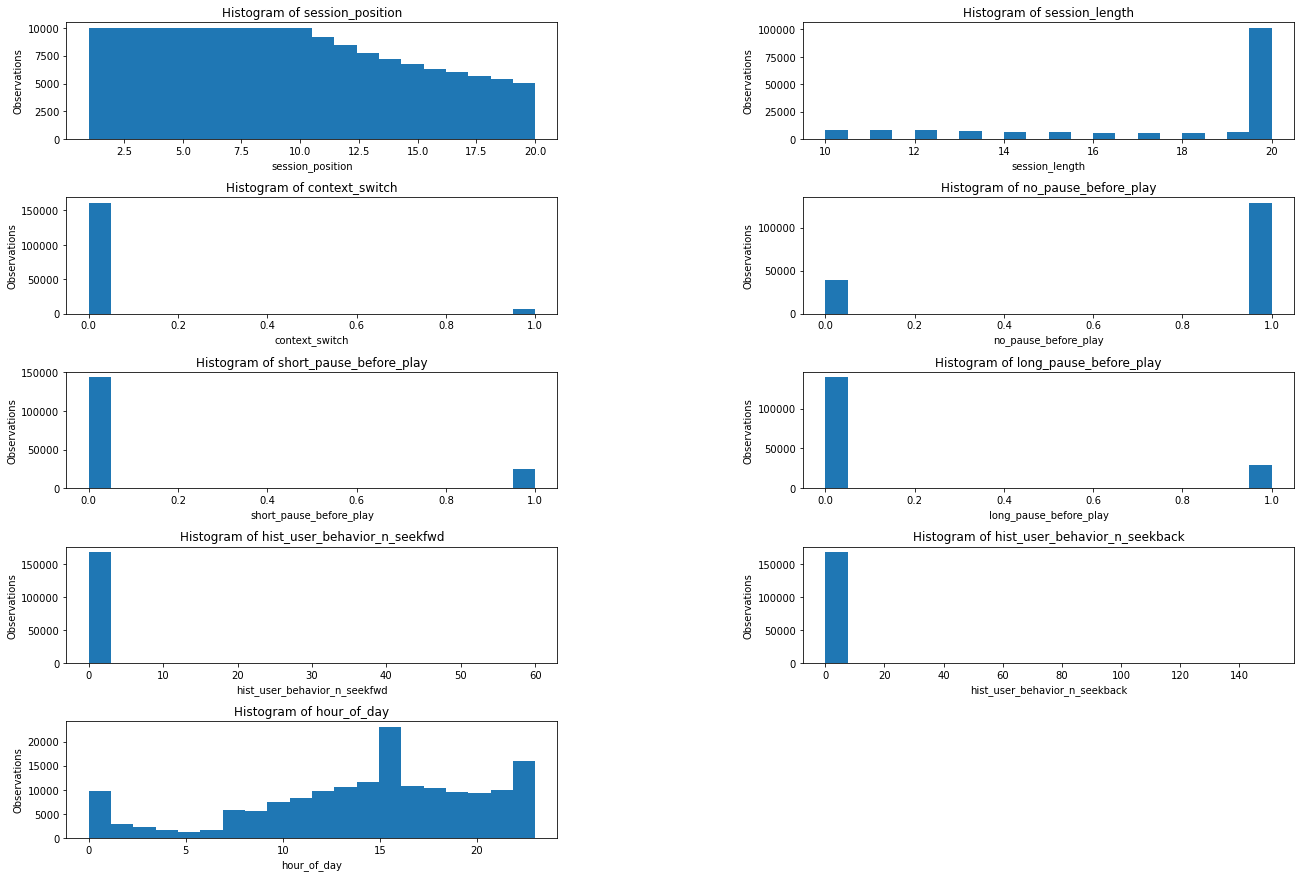

In [14]:
def get_dist(df, figsize, rotation, hspace, wspace):
    plt.figure(figsize=(figsize))
    for i, col in enumerate(df):
        num_vals = len(df.columns)
        num_cols = math.ceil(num_vals / 5)
        num_rows = math.ceil(num_vals / num_cols)
        plt.subplot(num_rows, num_cols, i+1)
        plt.hist(df[col], bins=20)
        plt.title('Histogram of {}'.format(col))
        plt.xlabel('{}'.format(col))
        plt.ylabel('Observations')
        plt.xticks(rotation=rotation)
        plt.subplots_adjust(hspace=hspace, wspace=wspace)

get_dist(spotify_int64, (22,15), 'horizontal', .5, .5)

In [15]:
spotify_int32 = df.select_dtypes(include='int32')

In [16]:
def get_dist(df, figsize, rotation, hspace, wspace):
    plt.figure(figsize=(figsize))
    for i, col in enumerate(df):
        num_vals = len(df.columns)
        num_cols = math.ceil(num_vals / 5)
        num_rows = math.ceil(num_vals / num_cols)
        plt.subplot(num_rows, num_cols, i+1)
        plt.hist(df[col], bins=20)
        plt.title('Histogram of {}'.format(col))
        plt.xlabel('{}'.format(col))
        plt.ylabel('Observations')
        plt.xticks(rotation=rotation)
        plt.subplots_adjust(hspace=hspace, wspace=wspace)

get_dist(spotify_int32, (22,15), 'horizontal', .5, .5)

<Figure size 1584x1080 with 0 Axes>

In [17]:
spotify_obj = df.select_dtypes(include='object')

In [18]:
pd.set_option("display.max_rows", 70)
print(df.date.unique())

['7/15/2018' '7/14/2018' '7/13/2018' '07-12-2018' '06-05-2018'
 '07-11-2018' '7/16/2018' '07-10-2018' '07-04-2018' '07-05-2018'
 '07-07-2018' '5/18/2018' '07-06-2018' '05-12-2018' '07-09-2018'
 '6/29/2018' '6/30/2018' '6/19/2018']


In [19]:
spotify_eda = df.drop(columns=[
    'date', 
    'session_id', 
    'track_id_clean', 
    'context_type', 
    'hist_user_behavior_reason_start',
    'hist_user_behavior_reason_end'
])

In [20]:
spotify_eda.dtypes

session_position                 int64
session_length                   int64
skip_1                           int32
skip_2                           int32
skip_3                           int32
not_skipped                      int32
context_switch                   int64
no_pause_before_play             int64
short_pause_before_play          int64
long_pause_before_play           int64
hist_user_behavior_n_seekfwd     int64
hist_user_behavior_n_seekback    int64
hist_user_behavior_is_shuffle    int32
hour_of_day                      int64
premium                          int32
dtype: object

In [21]:
print(spotify_eda.not_skipped)
print(spotify_eda.skip_1)
print(spotify_eda.skip_2)
print(spotify_eda.skip_3)

0         1
1         1
2         1
3         1
4         1
         ..
167874    1
167875    1
167876    1
167877    1
167878    1
Name: not_skipped, Length: 167879, dtype: int32
0         0
1         0
2         0
3         0
4         0
         ..
167874    0
167875    0
167876    0
167877    0
167878    0
Name: skip_1, Length: 167879, dtype: int32
0         0
1         0
2         0
3         0
4         0
         ..
167874    0
167875    0
167876    0
167877    0
167878    0
Name: skip_2, Length: 167879, dtype: int32
0         0
1         0
2         0
3         0
4         0
         ..
167874    0
167875    0
167876    0
167877    0
167878    0
Name: skip_3, Length: 167879, dtype: int32


In [22]:
spotify_eda_pd = spotify_eda

spotify_eda_pd['skipped'] = np.where(spotify_eda_pd['not_skipped']>0, 0, 1)

In [23]:
spotify_eda_pd.head()

,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,skipped
0,1,20,0,0,0,1,0,0,0,0,0,0,1,16,1,0
1,2,20,0,0,0,1,0,1,0,0,0,0,1,16,1,0
2,3,20,0,0,0,1,0,1,0,0,0,0,1,16,1,0
3,4,20,0,0,0,1,0,1,0,0,0,0,1,16,1,0
4,5,20,0,0,0,1,0,1,0,0,0,0,1,16,1,0


In [24]:
# Check what number of tracks in a listening session is most common
print(spotify_eda.session_length.value_counts())

20    101319
11      8272
10      8190
12      7752
13      7111
15      6525
14      6426
19      5966
18      5454
17      5440
16      5424
Name: session_length, dtype: int64


In [25]:
# Make slice with only those listening sessions that have 20 songs in them
spotify_20 = spotify_eda[spotify_eda['session_length'] == 20]

spotify_20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101319 entries, 0 to 167878
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   session_position               101319 non-null  int64
 1   session_length                 101319 non-null  int64
 2   skip_1                         101319 non-null  int32
 3   skip_2                         101319 non-null  int32
 4   skip_3                         101319 non-null  int32
 5   not_skipped                    101319 non-null  int32
 6   context_switch                 101319 non-null  int64
 7   no_pause_before_play           101319 non-null  int64
 8   short_pause_before_play        101319 non-null  int64
 9   long_pause_before_play         101319 non-null  int64
 10  hist_user_behavior_n_seekfwd   101319 non-null  int64
 11  hist_user_behavior_n_seekback  101319 non-null  int64
 12  hist_user_behavior_is_shuffle  101319 non-null  int32
 13 

In [26]:
len(spotify_20)

101319

In [27]:
spotify20_3tracks =  spotify_20[(spotify_20[
    'session_position'] == 1) | (spotify_20[
    'session_position'] == 10) | (spotify_20[
    'session_position'] == 20)]

In [28]:
spotify20_3tracks.head()

,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,premium,skipped
0,1,20,0,0,0,1,0,0,0,0,0,0,1,16,1,0
9,10,20,1,1,1,0,0,1,0,0,0,0,1,16,1,1
19,20,20,1,1,1,0,0,1,0,0,0,0,1,16,1,1
20,1,20,0,1,1,0,0,0,0,0,0,1,1,14,1,1
29,10,20,1,1,1,0,0,1,0,0,0,0,1,14,1,1


In [29]:
len(spotify20_3tracks)

15197

In [30]:
# A slice with all of the 1st tracks in each listening session:
spotify_track1 = spotify20_3tracks[spotify20_3tracks['session_position'] == 1]

# A slice with all of the 10th tracks in each listening session:
spotify_track10 = spotify20_3tracks[spotify20_3tracks['session_position'] == 10]

# A slice with all of the last (20th) track in each listening session:
spotify_track20 = spotify20_3tracks[spotify20_3tracks['session_position'] == 20]

In [31]:
len(spotify_track1)

5066

In [32]:
len(spotify_track10)

5066

In [33]:
len(spotify_track20)

5065

<AxesSubplot:>

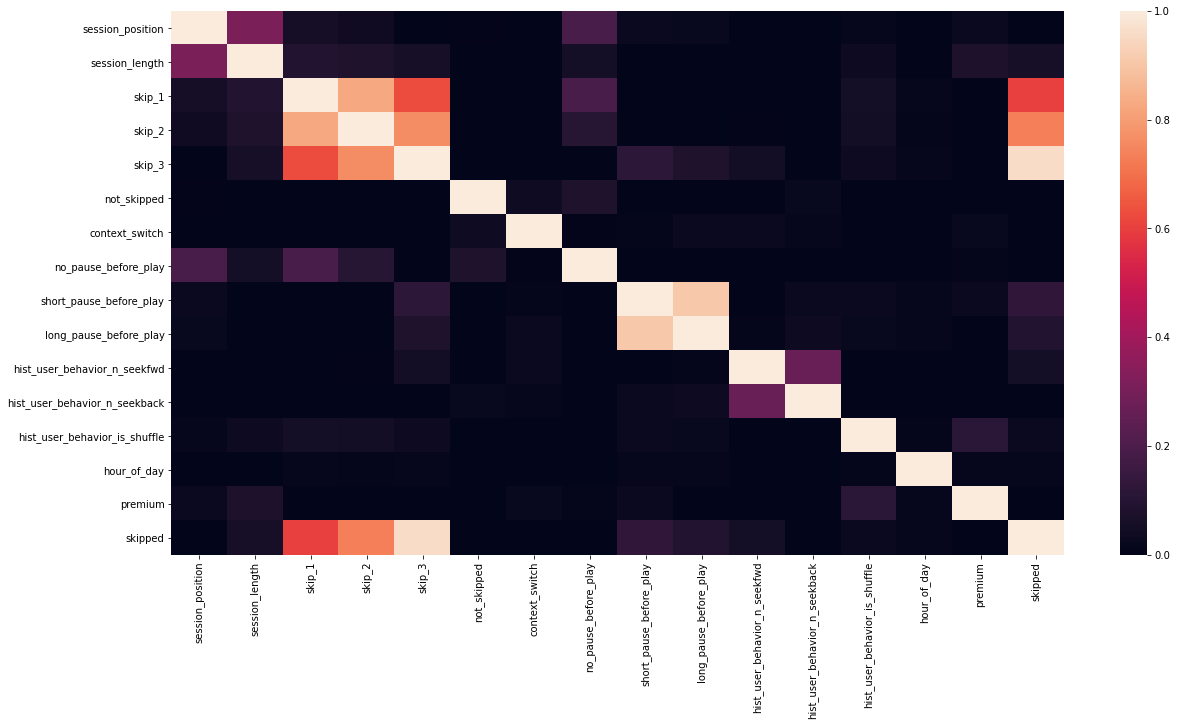

In [34]:
plt.figure(figsize=(20,10))
sns.heatmap(spotify_eda_pd.corr(),vmin=0,vmax=1)

In [35]:
t=pd.read_csv('C:/Users/Rohan Sharma/Desktop/Datasets/track_feats.csv')
t.head()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
0,t_7f435320-5d3b-497d-9346-0c97429af2b9,3.866097,0.441176,-0.403765,0.075846,0.499848,0.494943,0.461215,-0.208611,0.563252,...,0.571429,0.468440,1.034540,-1.040880,-1.281460,-0.375163,1.442307,0.045940,-0.443245,-0.243705
1,t_2a7b6393-ebec-4e1f-a53f-2ad842532c99,1.512969,0.308824,0.314153,0.085482,0.450139,0.457034,0.663219,-0.305010,0.767307,...,0.571429,0.655369,0.834594,-0.653568,-0.483168,-0.538935,1.247153,0.414248,-0.468285,-0.931875
2,t_949441c4-4920-4eed-b929-2d67d37b7bd9,-1.332280,0.485294,0.001032,0.002274,0.243778,0.229295,0.290262,-1.181899,0.958647,...,0.571429,0.293100,0.846650,0.123691,-2.692681,-0.770798,1.533066,-0.173705,-0.402540,1.181761
3,t_63eae5ac-744a-46ee-b719-0db8e70d6f7f,-0.712162,0.485294,0.558944,0.005024,0.338580,0.331703,0.348846,-0.795663,0.886674,...,0.571429,0.387131,0.920349,0.335177,-2.631787,-1.033223,1.549514,-0.036511,-0.488062,1.028883
4,t_a0747d21-6042-4af7-a21d-aa7cd1a8094e,-1.629474,0.573529,-0.356946,0.962717,0.130125,0.092335,0.170027,-2.024206,0.005674,...,0.428571,0.030858,2.238796,-3.259609,-2.378984,1.288895,-1.053248,-3.132837,0.946820,-0.623612


In [36]:
t.shape

(167879, 30)

In [37]:
t.tail()

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
167874,t_e406d4b3-4ff5-4ef9-9310-dfdcaa1a5b06,-0.472663,0.955882,0.659304,0.249200,0.699549,0.776374,0.772747,1.622813,0.660932,...,0.571429,0.827843,-1.570675,0.838155,0.586621,0.234062,-0.677627,-0.185732,-1.011336,0.382789
167875,t_91272e16-6c82-4568-ab2f-619363363dab,0.188572,0.955882,-1.562029,0.268087,0.237682,0.224157,0.384789,-1.196385,0.979508,...,0.571429,0.087821,0.245681,0.391603,-0.326496,-0.657344,-0.733951,0.988628,0.362557,1.462221
167876,t_2cacf7b0-1641-47d4-9659-79681a2496b4,-0.689870,0.955882,-0.220948,0.886830,0.780241,0.807878,0.716983,1.525430,0.509259,...,0.571429,0.175319,1.078703,-1.484873,0.033331,-0.218810,-1.749236,0.840015,0.363448,1.757199
167877,t_b25625ea-76b0-4b95-bc11-c92633f5bc99,0.828813,0.955882,0.486675,0.620327,0.606299,0.648090,0.779633,0.620606,0.536555,...,0.571429,0.680125,-0.363049,0.092029,1.510177,1.533927,0.923760,-0.170722,2.293271,-0.454710
167878,t_9e6edac9-f1c7-4670-8b74-ac6fd1c806cb,0.318980,0.955882,-0.248364,0.289664,0.538171,0.645589,0.699291,0.882752,0.600751,...,0.571429,0.646436,-1.527410,0.798326,0.631372,0.215341,-0.854275,-0.156684,-1.049429,0.466952


In [38]:
t.shape

(167879, 30)

In [39]:
t.sample(5)

,track_id,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
117856,t_98634054-aab3-4c6b-8ef6-65ba074c1222,-0.689327,1.000000,0.196081,0.160041,0.542800,0.620160,0.582915,0.628208,0.534484,...,0.428571,0.911683,-0.554284,0.210395,1.024549,1.856563,1.789530,-1.004362,2.254465,-0.019109
34233,t_4987e29b-1d14-4855-991b-e7bcd799fa0b,-1.505788,1.000000,-1.463986,0.043559,0.708114,0.761836,0.762264,1.352634,0.616467,...,0.571429,0.561404,-1.382476,0.637284,0.316506,0.325933,-0.854653,-0.269335,-0.769369,0.570387
76068,t_0cd40273-b5b3-48d1-b3ea-ffc4e78787d6,-1.162106,0.985294,0.504380,0.596653,0.549037,0.701758,0.540692,1.463053,0.644990,...,0.571429,0.559921,0.144596,0.532333,0.271090,-0.653099,-0.125821,0.298697,-0.283456,-0.824907
10343,t_1ebd59a0-e9f5-46e0-b936-5524152750ab,0.833326,0.970588,0.623925,0.377515,0.284741,0.244908,0.481910,-1.241386,0.330041,...,0.571429,0.133146,0.989765,0.292449,-0.153918,-1.274832,0.039985,0.795261,-0.337639,-1.163177
71832,t_5356e7ac-450a-4d91-8936-81160b5ccd9d,-0.443791,0.926471,-1.816945,0.780768,0.231133,0.195922,0.222549,-1.404058,0.283959,...,0.571429,0.254375,2.139856,-2.907699,-1.913857,1.244140,-0.764084,-2.436926,1.076598,-0.733594


In [40]:
gk = df.groupby("track_id_clean")

In [41]:
df.describe(include="all")

,session_id,session_position,session_length,track_id_clean,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,...,long_pause_before_play,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end
count,167879,167879.000000,167879.000000,167879,167879.000000,167879.000000,167879.000000,167879.000000,167879.000000,167879.000000,...,167879.000000,167879.000000,167879.00000,167879.000000,167879.000000,167879,167879.000000,167879,167879,167879
unique,10000,NaN,NaN,50704,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,18,NaN,6,9,7
top,0_049ca0a2-4d59-42b4-a5af-b208111177e8,NaN,NaN,t_bacf06d3-9185-4183-84ea-ff0db51475ce,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7/15/2018,NaN,user_collection,fwdbtn,fwdbtn
freq,20,NaN,NaN,1427,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,119638,NaN,67429,79912,81389
mean,NaN,9.325848,17.651809,NaN,0.421506,0.517182,0.648384,0.332877,0.040904,0.767600,...,0.172833,0.038909,0.04626,0.308734,14.193091,NaN,0.810417,NaN,NaN,NaN
std,NaN,5.457592,3.422031,NaN,0.493802,0.499706,0.477476,0.471244,0.198069,0.422364,...,0.378104,0.367296,0.60656,0.461973,5.996260,NaN,0.391972,NaN,NaN,NaN
min,NaN,1.000000,10.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,NaN,5.000000,15.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,11.000000,NaN,1.000000,NaN,NaN,NaN
50%,NaN,9.000000,20.000000,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.00000,0.000000,15.000000,NaN,1.000000,NaN,NaN,NaN
75%,NaN,14.000000,20.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.00000,1.000000,19.000000,NaN,1.000000,NaN,NaN,NaN


In [42]:
df.track_id_clean.unique

<bound method Series.unique of 0         t_0479f24c-27d2-46d6-a00c-7ec928f2b539
1         t_9099cd7b-c238-47b7-9381-f23f2c1d1043
2         t_fc5df5ba-5396-49a7-8b29-35d0d28249e0
3         t_23cff8d6-d874-4b20-83dc-94e450e8aa20
4         t_64f3743c-f624-46bb-a579-0f3f9a07a123
                           ...                  
167874    t_e76ba594-cebd-472d-a2da-483568be0406
167875    t_360910e8-2a84-42b0-baf1-59abcf96a1f2
167876    t_aa2fff77-9b0a-4fa3-a685-ecef50310e8a
167877    t_f673e1b7-4ebe-4fc1-ac24-a9f25de70381
167878    t_e172e8e7-7161-42a9-acb0-d606346c8f87
Name: track_id_clean, Length: 167879, dtype: object>

In [43]:
df["track_id"] = df["track_id_clean"]

In [44]:
df = df.drop("track_id_clean", axis=1)

In [45]:
df.columns

Index(['session_id', 'session_position', 'session_length', 'skip_1', 'skip_2',
       'skip_3', 'not_skipped', 'context_switch', 'no_pause_before_play',
       'short_pause_before_play', 'long_pause_before_play',
       'hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback',
       'hist_user_behavior_is_shuffle', 'hour_of_day', 'date', 'premium',
       'context_type', 'hist_user_behavior_reason_start',
       'hist_user_behavior_reason_end', 'track_id'],
      dtype='object')

In [46]:
df.head()

,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,...,hist_user_behavior_n_seekfwd,hist_user_behavior_n_seekback,hist_user_behavior_is_shuffle,hour_of_day,date,premium,context_type,hist_user_behavior_reason_start,hist_user_behavior_reason_end,track_id
0,0_00006f66-33e5-4de7-a324-2d18e439fc1e,1,20,0,0,0,1,0,0,0,...,0,0,1,16,7/15/2018,1,editorial_playlist,trackdone,trackdone,t_0479f24c-27d2-46d6-a00c-7ec928f2b539
1,0_00006f66-33e5-4de7-a324-2d18e439fc1e,2,20,0,0,0,1,0,1,0,...,0,0,1,16,7/15/2018,1,editorial_playlist,trackdone,trackdone,t_9099cd7b-c238-47b7-9381-f23f2c1d1043
2,0_00006f66-33e5-4de7-a324-2d18e439fc1e,3,20,0,0,0,1,0,1,0,...,0,0,1,16,7/15/2018,1,editorial_playlist,trackdone,trackdone,t_fc5df5ba-5396-49a7-8b29-35d0d28249e0
3,0_00006f66-33e5-4de7-a324-2d18e439fc1e,4,20,0,0,0,1,0,1,0,...,0,0,1,16,7/15/2018,1,editorial_playlist,trackdone,trackdone,t_23cff8d6-d874-4b20-83dc-94e450e8aa20
4,0_00006f66-33e5-4de7-a324-2d18e439fc1e,5,20,0,0,0,1,0,1,0,...,0,0,1,16,7/15/2018,1,editorial_playlist,trackdone,trackdone,t_64f3743c-f624-46bb-a579-0f3f9a07a123


In [47]:
df_list = pd.merge(df, t, on="track_id")

In [48]:
df_list.columns

Index(['session_id', 'session_position', 'session_length', 'skip_1', 'skip_2',
       'skip_3', 'not_skipped', 'context_switch', 'no_pause_before_play',
       'short_pause_before_play', 'long_pause_before_play',
       'hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback',
       'hist_user_behavior_is_shuffle', 'hour_of_day', 'date', 'premium',
       'context_type', 'hist_user_behavior_reason_start',
       'hist_user_behavior_reason_end', 'track_id', 'duration', 'release_year',
       'us_popularity_estimate', 'acousticness', 'beat_strength', 'bounciness',
       'danceability', 'dyn_range_mean', 'energy', 'flatness',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mechanism',
       'is_major', 'organism', 'speechiness', 'tempo', 'time_signature',
       'valence', 'acoustic_vector_0', 'acoustic_vector_1',
       'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4',
       'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7'],
      dtype='ob

In [49]:
sample = df_list.sample(frac=0.01, random_state=42)
sample.shape

(773, 50)

# Data Modelling

In [50]:
sample2 = sample[sample["premium"] == True]

In [51]:
sample2 = sample.drop(['session_id', 'date', 'premium', 'acoustic_vector_0', 'acoustic_vector_1', 'acoustic_vector_2', 'acoustic_vector_3', 'acoustic_vector_4', 'acoustic_vector_5', 'acoustic_vector_6', 'acoustic_vector_7'], axis=1)

In [52]:
sample2.shape

(773, 39)

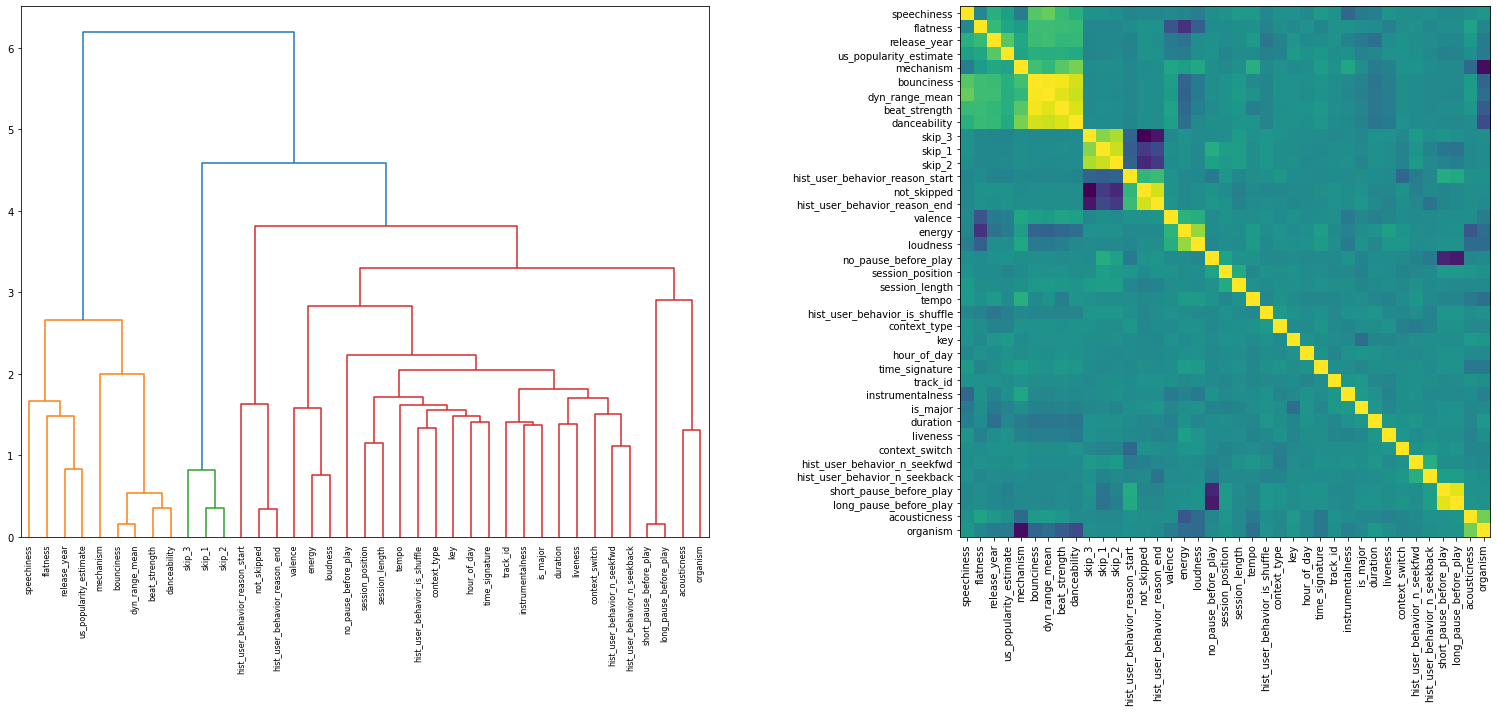

In [53]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))
corr = spearmanr(sample2).correlation
corr_linkage = hierarchy.ward(corr)
dendro = hierarchy.dendrogram(corr_linkage, labels=sample2.columns, ax=ax1,
                              leaf_rotation=90)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()
plt.show()

In [54]:
df_list.shape

(77322, 50)

In [55]:
df_list.describe(include="all")

,session_id,session_position,session_length,skip_1,skip_2,skip_3,not_skipped,context_switch,no_pause_before_play,short_pause_before_play,...,time_signature,valence,acoustic_vector_0,acoustic_vector_1,acoustic_vector_2,acoustic_vector_3,acoustic_vector_4,acoustic_vector_5,acoustic_vector_6,acoustic_vector_7
count,77322,77322.000000,77322.000000,77322.000000,77322.000000,77322.000000,77322.000000,77322.000000,77322.000000,77322.000000,...,77322.000000,77322.000000,77322.000000,77322.000000,77322.000000,77322.000000,77322.000000,77322.000000,77322.000000,77322.000000
unique,9855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0_0d2e30c1-c18d-434f-ac82-a9a4a398fd19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,9.286219,17.632252,0.419286,0.512829,0.644538,0.335403,0.043248,0.764465,0.146970,...,0.564112,0.460386,-0.645811,0.433411,0.366561,-0.007078,-0.353722,0.062889,-0.444047,0.119604
std,NaN,5.469580,3.437326,0.493445,0.499839,0.478656,0.472134,0.203416,0.424335,0.354078,...,0.049254,0.226366,0.901888,0.635158,0.642300,0.728996,0.785328,0.668865,0.779505,0.750174
min,NaN,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.980544,-4.271481,-3.547473,-2.216054,-2.362752,-5.556263,-1.621686,-2.791157
25%,NaN,5.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.571429,0.277864,-1.394554,0.294916,0.242208,-0.435404,-0.847535,-0.413443,-0.961918,-0.094565
50%,NaN,9.000000,20.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.571429,0.442084,-0.997073,0.566032,0.469957,0.165709,-0.683405,-0.003759,-0.694058,0.387806
75%,NaN,14.000000,20.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.571429,0.619811,0.084567,0.786728,0.713441,0.426802,-0.084656,0.613034,-0.182768,0.526453


In [56]:
df_list["skip_1"].value_counts(normalize="True")

0    0.580714
1    0.419286
Name: skip_1, dtype: float64

In [57]:
df_list["skip_2"].value_counts(normalize="True")

1    0.512829
0    0.487171
Name: skip_2, dtype: float64

In [58]:
df_list["skip_3"].value_counts(normalize="True")

1    0.644538
0    0.355462
Name: skip_3, dtype: float64

In [59]:
df_list["not_skipped"].value_counts(normalize="True")

0    0.664597
1    0.335403
Name: not_skipped, dtype: float64

In [60]:
df_list["premium"].value_counts()

1    62373
0    14949
Name: premium, dtype: int64

In [61]:
df_list2 = df_list[df_list["premium"] == True]

In [62]:
sample2 = df_list2.sample(frac=.01,random_state=42)
sample.shape

(773, 50)

In [63]:
df_list["skip_2"] = df_list["skip_2"] *1

G:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='skip_2', ylabel='Density'>

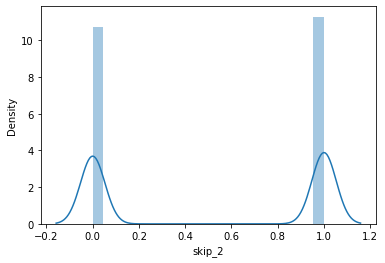

In [64]:
sns.distplot(df_list['skip_2'])

In [65]:
df_list2.shape

(62373, 50)

### Training and Testing

In [66]:
features = ['session_position', 'session_length','hour_of_day', 'context_type',
       'duration', 'release_year', 'us_popularity_estimate',
       'acousticness', 'beat_strength', 'bounciness', 'danceability',
       'dyn_range_mean', 'energy', 'flatness', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mechanism', 'organism', 'speechiness',
       'tempo', 'time_signature', 'valence']
target = 'not_skipped'
drop = ['track_id','skip_1', 'skip_2', 'skip_3', 'no_pause_before_play','short_pause_before_play', 'long_pause_before_play','context_switch', 
       'hist_user_behavior_n_seekfwd', 'hist_user_behavior_n_seekback','hist_user_behavior_is_shuffle','hist_user_behavior_reason_start', 'hist_user_behavior_reason_end']

X = df_list[features]
y = df_list[target]

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [69]:
print(X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape)

(49485, 24) (12372, 24) (15465, 24) (49485,) (12372,) (15465,)


In [70]:
y_val.value_counts(normalize=True)

0    0.667475
1    0.332525
Name: not_skipped, dtype: float64

In [71]:
pd.set_option('display.max_columns', None)
X_train.head()

,session_position,session_length,hour_of_day,context_type,duration,release_year,us_popularity_estimate,acousticness,beat_strength,bounciness,danceability,dyn_range_mean,energy,flatness,instrumentalness,key,liveness,loudness,mechanism,organism,speechiness,tempo,time_signature,valence
61516,7,16,20,catalog,0.139035,0.985294,0.711563,0.176131,0.239994,0.233295,0.373157,-1.137403,0.930990,0.943047,9.120000e-06,0.181818,0.318512,0.896751,0.637437,0.285021,0.050623,1.822698,0.571429,0.740442
46559,3,12,10,editorial_playlist,0.887640,0.411765,0.715369,0.256618,0.589970,0.548680,0.671336,-0.156073,0.372577,0.994820,7.950000e-05,0.818182,0.048125,-2.251594,0.835025,0.215719,0.032333,-0.938649,0.571429,0.731638
59398,12,20,11,radio,-0.402971,1.000000,0.710353,0.009451,0.649624,0.706252,0.818009,1.004232,0.573350,1.040906,4.530000e-06,0.727273,0.114159,-0.058912,0.698925,0.212997,0.219545,0.464045,0.571429,0.304313
7629,16,20,13,editorial_playlist,0.508533,1.000000,0.715372,0.013258,0.547136,0.638742,0.705225,0.780894,0.784390,1.007404,3.360000e-08,0.181818,0.168045,0.350209,0.642405,0.253032,0.270850,1.295506,0.571429,0.376777
37039,6,13,17,user_collection,-0.429949,0.926471,0.713986,0.000954,0.527887,0.628604,0.775102,0.762489,0.823262,0.978493,1.530000e-07,0.090909,0.143810,0.436883,0.578512,0.298037,0.270804,0.300063,0.571429,0.272769


In [72]:
df_list["skip_2"].value_counts(normalize=True)

1    0.512829
0    0.487171
Name: skip_2, dtype: float64

### Model Selection 

In [73]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
pipeline = make_pipeline(
    ce.TargetEncoder(), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_test, y_test))

G:\Anaconda\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Validation Accuracy 0.6320077594568381


In [74]:
y_pred = pipeline.predict(X_test)

In [75]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

print("Accuracy:",accuracy_score(y_test, y_pred))
print("ROC:",roc_auc_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))

Accuracy: 0.6320077594568381
ROC: 0.5326110982432777
Recall: 0.22658494541275617
Precision: 0.4171368124118477


### XGBoost Algorithm

In [76]:
from xgboost.sklearn import XGBClassifier
from xgboost import XGBClassifier
pipeline = make_pipeline(
    ce.TargetEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

G:\Anaconda\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
G:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:16:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [77]:
print('Validation Accuracy', accuracy_score(y_test, y_pred))

Validation Accuracy 0.6565147106369221


<AxesSubplot:title={'center':'Top 20 features'}>

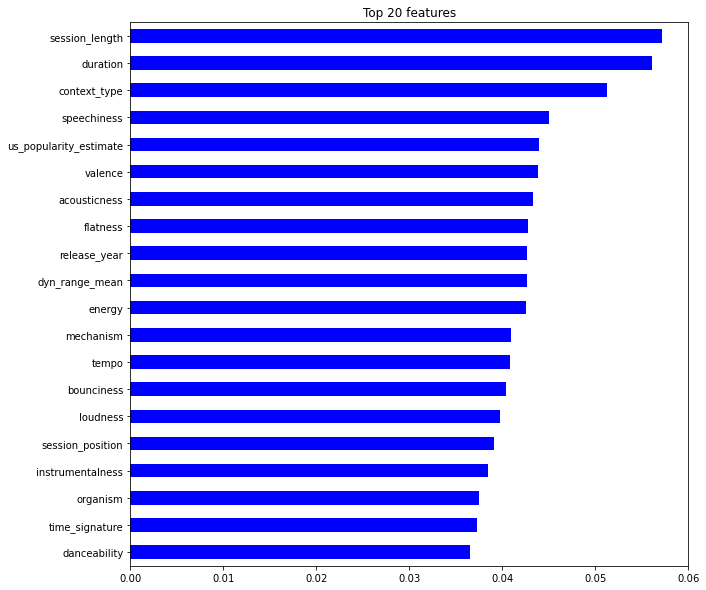

In [78]:
rf = pipeline.named_steps['xgbclassifier']
importances = pd.Series(rf.feature_importances_, X_test.columns)
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue')

In [79]:
encoder = ce.TargetEncoder()
X_train_encoded = encoder.fit_transform(X_train,y_train)
X_test_encoded = encoder.transform(X_test)

X_train.shape, X_test.shape, X_train_encoded.shape, X_test_encoded.shape

G:\Anaconda\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


((49485, 24), (15465, 24), (49485, 24), (15465, 24))

In [80]:
gb = make_pipeline(
    ce.TargetEncoder(), 
    XGBClassifier(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print('Gradient Boosting accuracy', accuracy_score(y_test, y_pred))

G:\Anaconda\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
G:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Gradient Boosting accuracy 0.6475913352731976


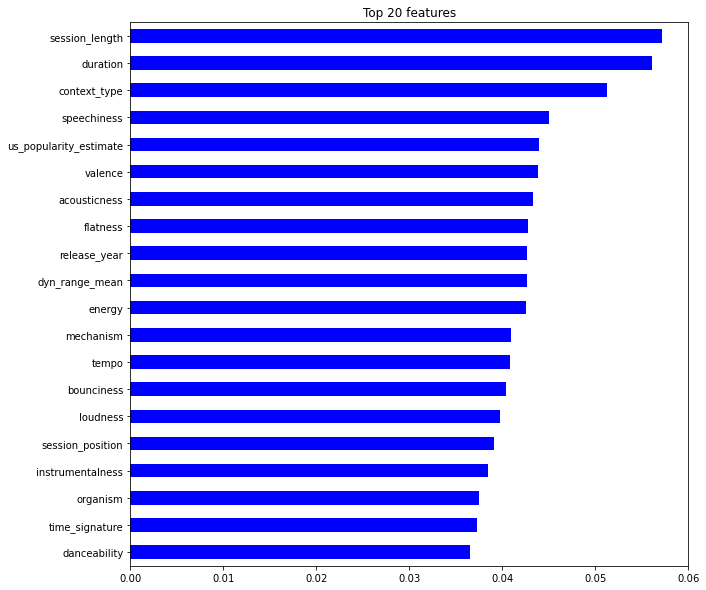

In [81]:
rf = pipeline.named_steps['xgbclassifier']
importances = pd.Series(rf.feature_importances_, X_test.columns)
n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue');


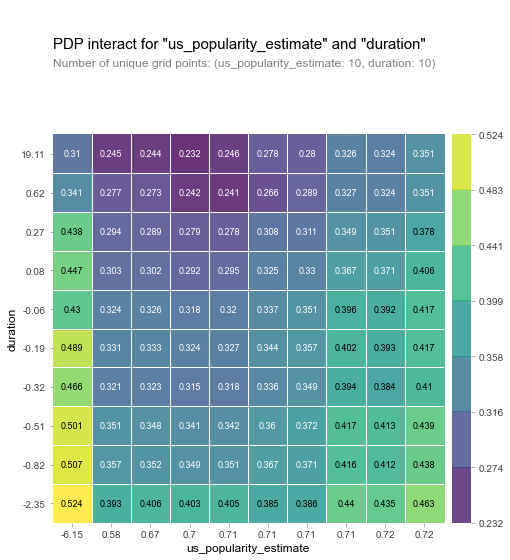

In [82]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['us_popularity_estimate', 'duration']

interaction = pdp_interact(
    model=gb, 
    dataset=X_test, 
    model_features=X_train.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

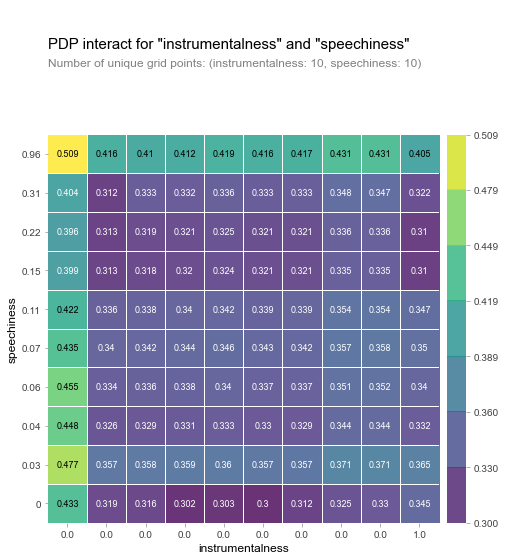

In [83]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['instrumentalness', 'speechiness']

interaction = pdp_interact(
    model=gb, 
    dataset=X_test, 
    model_features=X_train.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

In [85]:
import pickle
Pkl_Filename = "lbm.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(gb, file)